In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [31]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [32]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## I
# weekly-closings-of-the-dowjones

In [67]:
series=pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Weekly closings']
print(series)

0      890.19
1      901.80
2      888.51
3      887.78
4      858.43
5      850.61
6      856.02
7      880.91
8      908.15
9      912.75
10     911.00
11     908.22
12     889.31
13     893.98
14     893.91
15     874.85
16     852.37
17     839.00
18     840.39
19     812.94
20     810.67
21     816.55
22     859.59
23     856.75
24     873.80
25     881.17
26     890.20
27     910.37
28     906.68
29     907.44
        ...  
132    841.48
133    855.47
134    859.39
135    843.94
136    820.40
137    820.32
138    855.99
139    851.92
140    878.05
141    887.83
142    878.13
143    846.68
144    847.54
145    844.81
146    859.90
147    834.64
148    845.90
149    850.44
150    818.84
151    816.65
152    802.17
153    853.72
154    843.09
155    815.39
156    802.41
157    791.77
158    787.23
159    787.94
160    784.57
161    752.58
Name: Weekly closings, Length: 162, dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


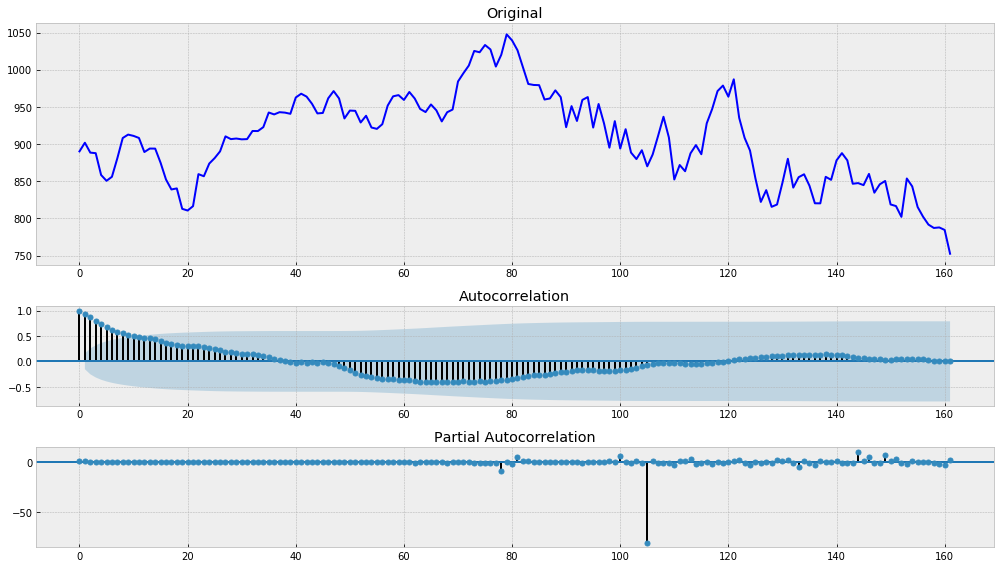

In [68]:
tsplot(series)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [69]:
series = boxcox(series, 0.5)

Results of Dickey-Fuller Test:
Test Statistic                  -1.263690
p-value                          0.645616
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


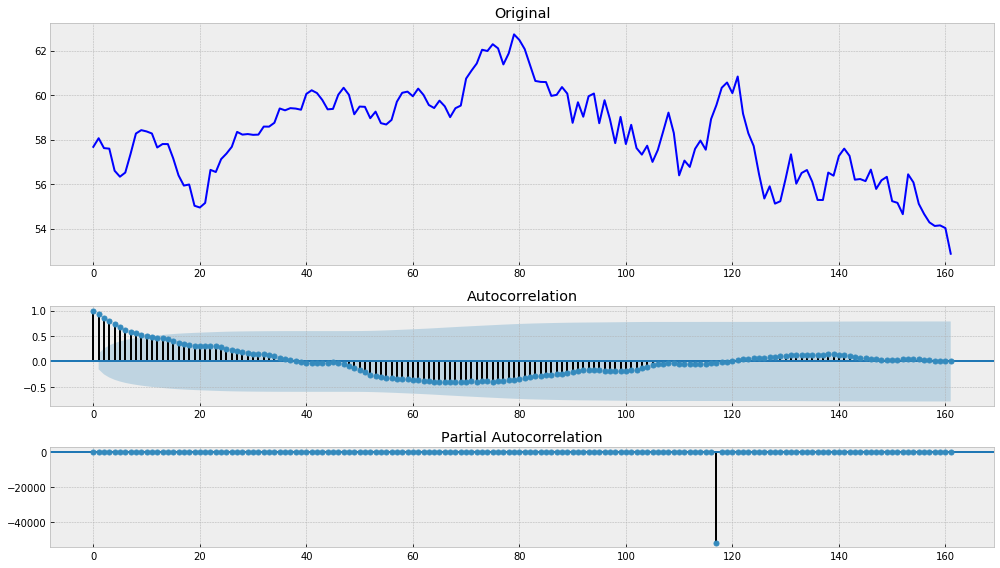

In [70]:
tsplot(series)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [71]:
series = np.diff(series, 1) #диффиренциируем

Results of Dickey-Fuller Test:
Test Statistic                -1.301319e+01
p-value                        2.542560e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


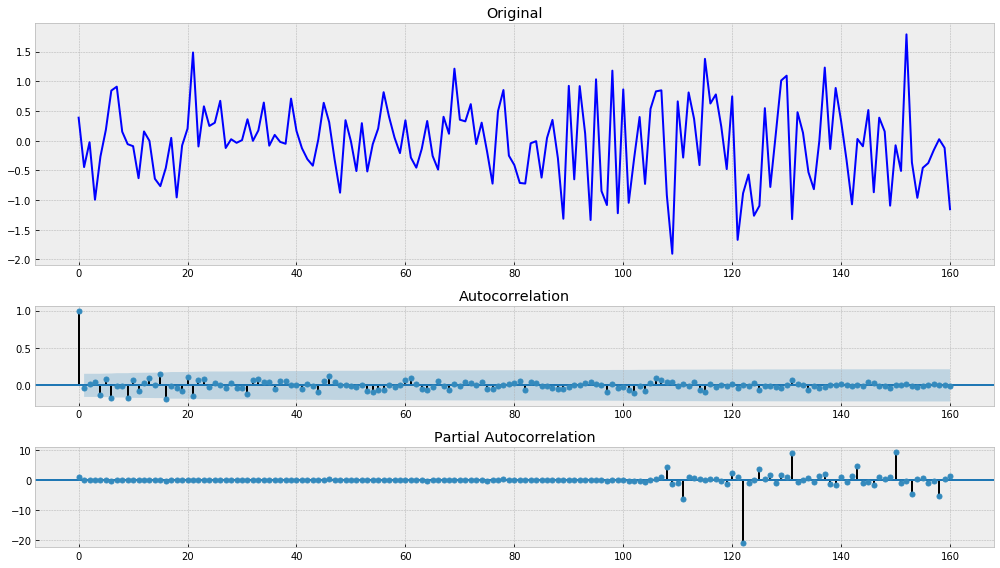

In [72]:
tsplot(series)

In [73]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -5.070912
p-value                          0.000016
#Lags Used                      14.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


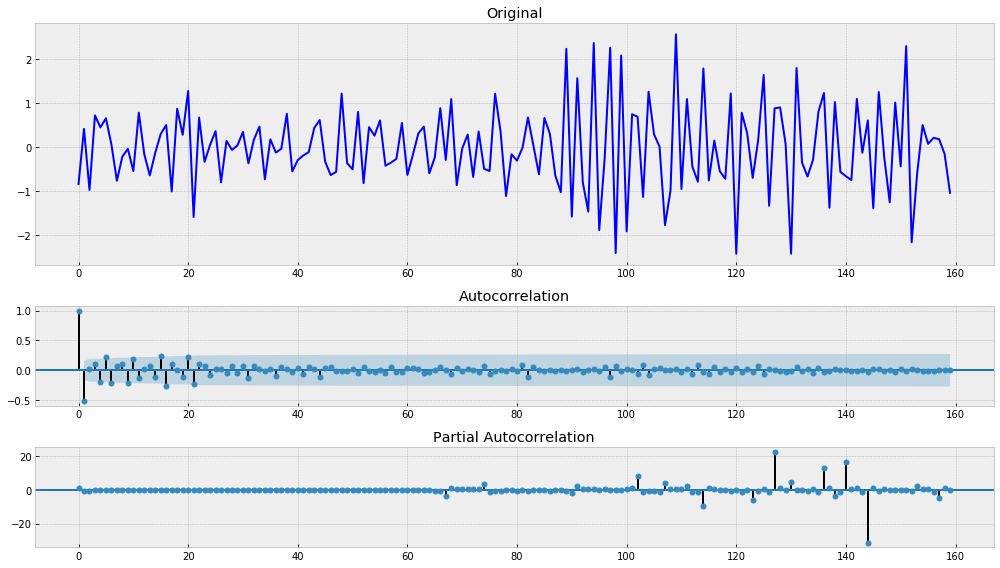

In [74]:
tsplot(series)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

In [75]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.971618e+00
p-value                        8.635580e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


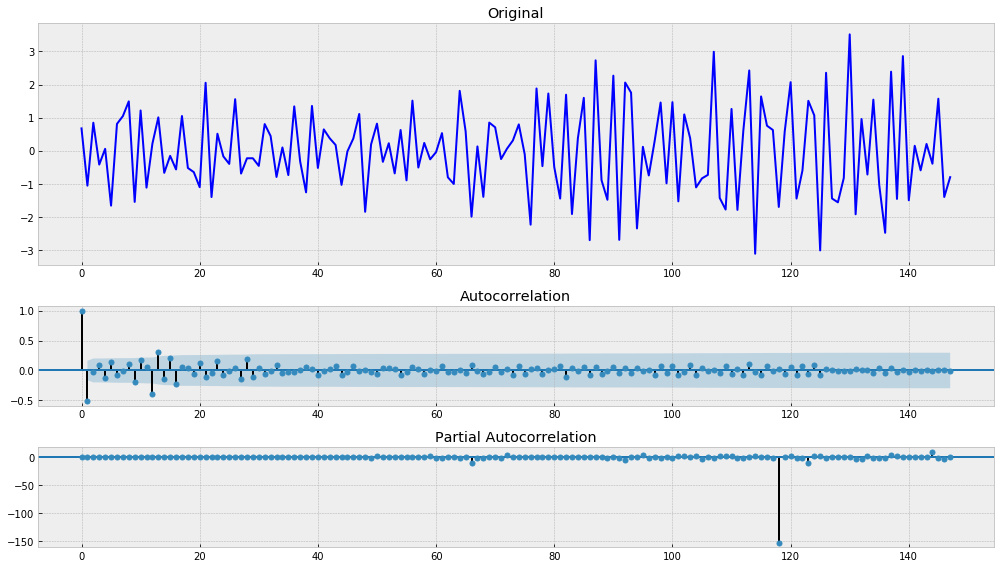

In [76]:
tsplot(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

## II
# monthly-us-auto-registration

In [90]:
series = pd.read_csv("monthly-us-auto-registration-tho.csv")["Count"]

KeyError: 'Count'